In [2]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
video = cv2.VideoCapture(0)

while True:
    #read image
    ret, img = video.read()
    
    #resize image
    img = cv2.resize(img, (400,300))

    # normalize float versions
    norm_img1 = cv2.normalize(img, None, alpha=0, beta=1.2, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    norm_img2 = cv2.normalize(img, None, alpha=0, beta=3, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # scale to uint8
    norm_img1 = (255*norm_img1).astype(np.uint8) 
    norm_img2 = np.clip(norm_img2, 0, 1)
    norm_img2 = (255*norm_img2).astype(np.uint8)
    

    # display input and both output images
    cv2.imshow('original',img)
    cv2.imshow('contrast_stretch1',norm_img1)
    cv2.imshow('contrast_stretch2',norm_img2)
    
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break 
    
video.release()
cv2.destroyAllWindows()

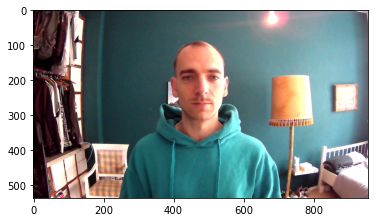

In [3]:
img = cv2.imread("./Image2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [4]:
def adjust_gamma(image, gamma=1.0):

   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

   return cv2.LUT(image, table)

gamma = 2.5                                   # change the value here to get different result
adjusted = adjust_gamma(img, gamma=gamma)

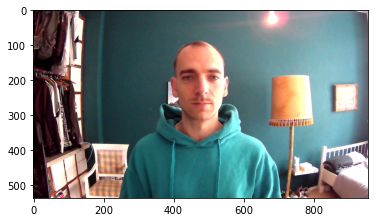

In [5]:
plt.imshow(img)

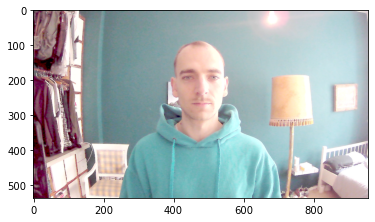

In [6]:
plt.imshow(adjusted)

In [20]:
img_dark = cv2.imread("/Users/tobiasschulz/Documents/GitHub/mask-detector/face_detector_ssd/dark_img_opti/Image2.png")
hsv = cv2.cvtColor(img_dark, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

In [41]:
alpha = 1.5
beta = 100

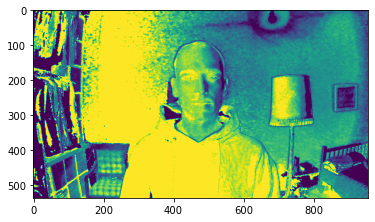

In [46]:
plt.imshow(s)

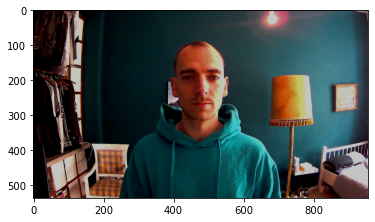

In [43]:
plt.imshow(cv2.cvtColor(img_dark, cv2.COLOR_BGR2RGB))

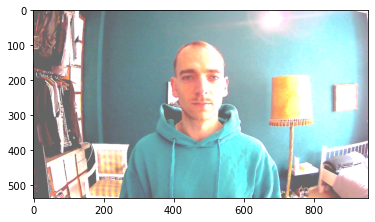

In [42]:
new_image = cv2.addWeighted(img_dark, alpha, np.zeros(img_dark.shape, 
                                    img_dark.dtype), 0, beta)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))